# PART 1: The following problem will focus on simple probability rules
Suppose there is a skytrain that travels at a variety of speeds depending on factors such 
as time of day, weather, etc. The speed at which the skytrain travels at can be modelled by the 
following random variable:
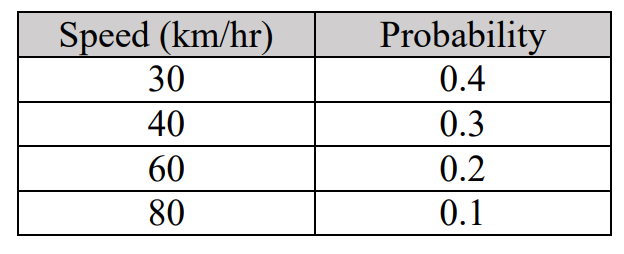
Suppose there are three such skytrains independently travelling at once. After one run of 
each skytrain, what is the probability that:

## A All three skytrains travelled at 40 km/hr?
The probability for 1 skytrain is 0.3, and the 3 of them run independently. To combine independent probabilities, simply multiply them together.

In [2]:
a = 0.3*0.3*0.3
a

[1] 0.027

## B All three skytrains travelled at 60 km/hr or less?
So it's going to be 0.2, 0.3 and 0.4 that we have to combine some how (leaving out 80 since it's above 60). So we can use a CDF (cumulative distribution for that). Let's find the probability of 1 train: 

$$
P(X≤x)=\sum_{k≤x}f(x)
$$

$f(60)+f(50)+f(40)=0.4+0.3+0.2=0.9, \therefore  \text{  The chances are 0.9 or 90% for 1 train}$

for all 3 trains, it would be:

In [2]:
b = 0.9*0.9*0.9
b

[1] 0.729

## C. At least one skytrain travelled at 80 km/hr?
To do this, we would have to manually add up: 

* p of only first train going 80.
* p of only second train going 80.
* p of only third train going 80.

Wow, we're not even done.

* p of only first and second train going 80.
* p of only first and third train going 80.
* p of only second and third train going 80.
* p of all 3 trains going 80.

add all of these 7 events up, you got a probability! Let's do that!

In [7]:
P1 = 0.1 * 0.9 * 0.9
P2 = 0.9 * 0.1 * 0.9
P3 = 0.9 * 0.9 * 0.1

P12 = 0.1 * 0.1 * 0.9
P13 = 0.1 * 0.9 * 0.1
P23 = 0.9 * 0.1 * 0.1

P123 = 0.1 * 0.1 * 0.1

all = c(P1,P2,P3,P12,P13,P23,P123)
sum(all)

[1] 0.271

tedious as hell! But here's a little secret. If you just do the probability of no train going 80, then subtract by 1, you'll get the probability that 1 train goes 80, watch:

In [6]:
no80 = (1 - 0.1) * (1-0.1) * (1-0.1)

# Then 1 - none of them going 80 = at least 1 is going 80. 

1 - no80

[1] 0.271

## D. At least two skytrains travelled at 80 km/hr?
Easy

In [1]:
P12 = 0.1 * 0.1 * 0.9
P13 = 0.1 * 0.9 * 0.1
P23 = 0.9 * 0.1 * 0.1
P123 = 0.1 * 0.1 * 0.1

at_least_2 = c(P12, P13, P23, P123)
sum(at_least_2)

[1] 0.028

# Part 2: Conditional Probabilites
Suppose we take 3 skytrains and connect them in a chain as shown in the picture below:
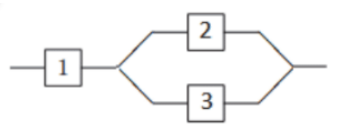
The probability that each skytrain breaks down and stops is 0.1

## A. Find the reliability of the whole skytrain chain.
to do that, we just have to find the probability that the system will fail (we'll call that $F$) then to get relaibilty (which we'll call $R$) we can do $R = 1 - F$.

So how can it fail? Well if 1 breaks down, the thing will die, so if 1 fails, 

The other way is if BOTH 2 and 3 fail. If only 1 fails (say 2) then 3 and 1 can still go through.

And remember, they are independent, so we can multiply them together to combine probabilities.

In [3]:
#First the failure probability
f1 = 0.1
f23 = 0.1 * 0.1

#Now to get reliability:
r1 = 1 - f1
r23 = 1 - f23

#To get the overall reliability
rt = r1 * r23
rt

[1] 0.891

This type of stuff is done all the time in electrical engineering, but chemical engineering should see it's fair share fo this, say if it were like a pump or a distiller or something. 

# B. Given that the chain is broken, find the probability that skytrain 1 broke down. 

First, what's the probability of this system breaking down?

$$P(D) = 1 - 0.891 = 0.109$$

Now we can do the $P(T1|D)$ thing.

$$
P(T1|D) = \frac{P(T1\cap D)}{P(D)} =  \frac{0.1}{0.109} = 91.74\%
$$

# C. Suppose you know with 100% certainty that skytrain 3 will not break down.  What is the updated reliability of the skytrain chain

Now it doesn't matter if train 2 breaks, because 3 is 100%! So the only way this thing breaks is if 1 breaks. $\therefore$ the new reliability is 

$$
R = 1-F1 = 1 - 0.1 = 0.9
$$
